## Women's E-Commerce Clothing Reviews

<br>**Context**
<br>Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

<br>**Content**
<br>This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

<br>Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
<br>Age: Positive Integer variable of the reviewers age.
<br>Title: String variable for the title of the review.
<br>Review Text: String variable for the review body.
<br>Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
<br>Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
<br>Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
<br>Division Name: Categorical name of the product high level division.
<br><br>Department Name: Categorical name of the product department name.
<br>Class Name: Categorical name of the product class name.

## source :    
Data and the above description are from kaggle:https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews?resource=download

## Problem Statement :
<br> Given the Description about the product and reviews predict the ratings given are either positive and negative.

## Performace metrics:
<br> we will use confusion matrix and roc_aus as performance metric

In [326]:
#importing libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

**Data Reading and wrangling** 


In [327]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [328]:
df.shape

(23486, 11)

In [329]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [330]:
# There is no column Unnamed:0 in data dictionary and by looking it seems like an id so lets drop this column
df = df.drop(['Unnamed: 0'],axis=1)

In [331]:
## since we are just trying to classify review as positive or negative so we will drop the rows having the Ratings =3
data = df[df['Rating']!=3]

In [332]:
data.shape

(20615, 10)

In [333]:
# Lets encode the reviews as positive and negative
def pos_neg_reviews(rating):
    if rating>=4:
        return 1 # encoding 1-positive and 0-negative
    elif rating <= 2:
        return  0

In [334]:
data['labels'] = data['Rating'].apply(lambda x:pos_neg_reviews(x))

In [335]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,labels
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0


In [336]:
data.drop(['Rating'], axis=1,inplace =True)

In [337]:
# dropping the Clothing ID column
data.drop(['Clothing ID'],axis=1, inplace=True)

In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20615 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      20615 non-null  int64 
 1   Title                    17212 non-null  object
 2   Review Text              19818 non-null  object
 3   Recommended IND          20615 non-null  int64 
 4   Positive Feedback Count  20615 non-null  int64 
 5   Division Name            20601 non-null  object
 6   Department Name          20601 non-null  object
 7   Class Name               20601 non-null  object
 8   labels                   20615 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.6+ MB


In [339]:
# final data shape is
print("The final shape of data is",data.shape)

The final shape of data is (20615, 9)


out of the 8 features, 3 is of int type,5 of object type. And out of these 5 object type, we have title, review is of text feature and rest 3 is categorical feature. 

## Data Cleaning

In [340]:
# checking if there is null values
data.isnull().sum()

Age                           0
Title                      3403
Review Text                 797
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
labels                        0
dtype: int64

(1) Since the main goal is to predict review sentiment based on the review text and in 797 categories we have no review text so we will simply drop those rows.
<br> (2) we have 3403 null value in the title, so will simply create a title name as none and fill it with that
<br> (3) since Division name ,Department Name, Class Name are categorical in nature, we will impute using most frequent category.

In [341]:
# filling the title Nan value with none string
data['Title'].fillna('none',inplace=True)

In [342]:
data['Division Name'].value_counts()

General           12077
General Petite     7177
Initmates          1347
Name: Division Name, dtype: int64

In [343]:
# since the maximum frequency of the Division Name is General, so we will impute the null value with general
data['Division Name'].fillna('General',inplace=True)

In [344]:
data['Department Name'].value_counts()

Tops        9144
Dresses     5481
Bottoms     3378
Intimate    1557
Jackets      941
Trend        100
Name: Department Name, dtype: int64

In [345]:
# since the maximum frequency of the Department Name is Tops , so we will impute the null value with general
data['Department Name'].fillna('Tops',inplace=True)

In [346]:
data['Class Name'].value_counts()

Dresses           5481
Knits             4227
Blouses           2703
Sweaters          1233
Pants             1231
Jeans             1032
Fine gauge         981
Skirts             837
Jackets            642
Lounge             613
Swim               308
Outerwear          299
Shorts             276
Sleep              211
Legwear            149
Intimates          138
Layering           137
Trend              100
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

In [347]:
# since the maximum frequency of the Class Name is Dresses , so we will impute the null value with general
data['Class Name'].fillna('Dresses',inplace=True)

In [348]:
data.isnull().sum()

Age                          0
Title                        0
Review Text                797
Recommended IND              0
Positive Feedback Count      0
Division Name                0
Department Name              0
Class Name                   0
labels                       0
dtype: int64

In [349]:
# since we have imputed all the other features except the review text, we will drop the rows having no review text.
data.dropna(how='any',axis=0,inplace = True)

In [350]:
data.shape

(19818, 9)

In [351]:
data.isnull().sum()

Age                        0
Title                      0
Review Text                0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
labels                     0
dtype: int64

**Checking duplicates**

In [352]:
df[df.duplicated()].count()

Clothing ID                21
Age                        21
Title                       0
Review Text                 1
Rating                     21
Recommended IND            21
Positive Feedback Count    21
Division Name              21
Department Name            21
Class Name                 21
dtype: int64

In [353]:
# since there are duplicates present lets drop
data.drop_duplicates(inplace=True)

In [354]:
data.shape

(19816, 9)

After imputation and removing duplicates, lets perform some exploratory data analysis.

## Exploratory data analysis

**1. Univariate analysis**

In [355]:
data.columns

Index(['Age', 'Title', 'Review Text', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'labels'],
      dtype='object')

**labels**
<br> since labels are the target variable.

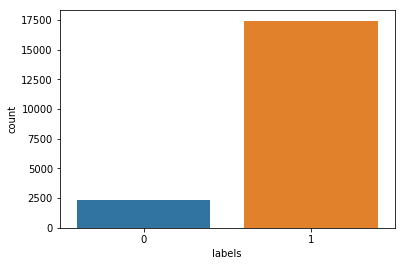

In [356]:
sns.countplot(data['labels'])

In [357]:
data['labels'].value_counts()

1    17446
0     2370
Name: labels, dtype: int64

**Inference:** Imbalanced dataset having most of the reviews are positive.

**Age**

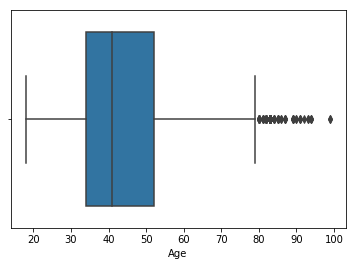

In [358]:
sns.boxplot(data['Age'])

In [359]:
data['Age'].describe()

count    19816.000000
mean        43.440704
std         12.396092
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

The age of the customer ranges from the 18 to 99 years, however the central 50% range is 34 to 52

In [360]:
count = 0
for ele in data['Age']:
    if ele > 79:
        count += 1
print("The total reviews given by the customer whose age is greater than 79 is", count)

The total reviews given by the customer whose age is greater than 79 is 102


**Recommended IND**

In [361]:
data['Recommended IND'].value_counts()

1    17368
0     2448
Name: Recommended IND, dtype: int64

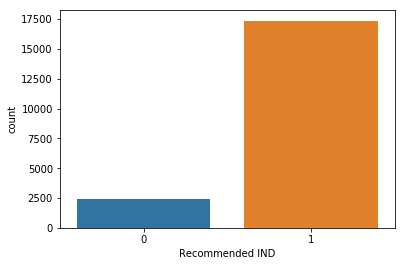

In [362]:
sns.countplot(data['Recommended IND'])

**Inference:** Most of the product are recommended by the users

**Positive Feedback Count**

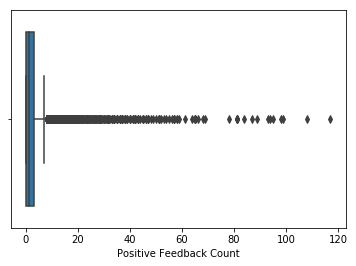

In [363]:
sns.boxplot(data['Positive Feedback Count'])

**Inference:** Some reviews are found helpful by many users,but however this is not the case for all.

**Division Name**

In [364]:
data['Division Name'].value_counts()

General           11637
General Petite     6908
Initmates          1271
Name: Division Name, dtype: int64

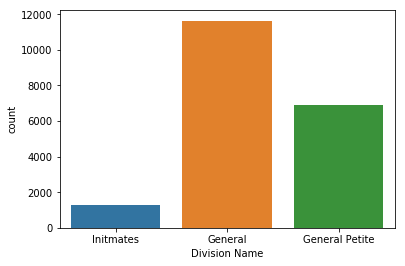

In [365]:
sns.countplot(data['Division Name'])

**Inference:** General devision have the maximum review however initmates have the minimum. 

**Department Name**

In [366]:
data['Department Name'].value_counts()

Tops        8761
Dresses     5315
Bottoms     3254
Intimate    1475
Jackets      912
Trend         99
Name: Department Name, dtype: int64

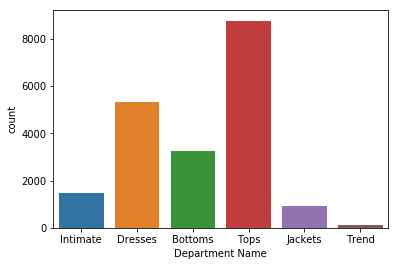

In [367]:
sns.countplot(data['Department Name'])

**Inference:** we have total 5 departments, out of which top has gotten the maximum review and trend has minimum.

**Class Name**

In [368]:
data['Class Name'].value_counts()

Dresses           5328
Knits             4021
Blouses           2599
Pants             1196
Sweaters          1187
Jeans              993
Fine gauge         941
Skirts             799
Jackets            622
Lounge             591
Outerwear          290
Swim               289
Shorts             265
Sleep              198
Legwear            142
Intimates          131
Layering           123
Trend               99
Casual bottoms       1
Chemises             1
Name: Class Name, dtype: int64

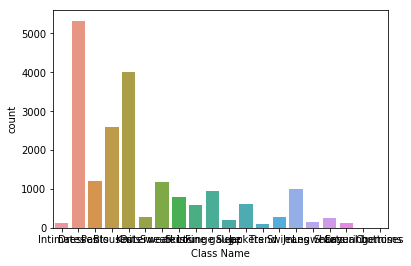

In [369]:
sns.countplot(data['Class Name'])

**Inference:** 
<br>(1)There is only one data of casual bottoms and chemises, it may create problem after train test split and one hot encoding so lets remove these.
<br>(2) out of 18 the maximum class belong to dresses and minimum to Trend 

In [370]:
df2 = data[data['Class Name'] != 'Casual bottoms']
data = df2[df2['Class Name'] != 'Chemises']

**2. Bivariate analysis**

**Age vs labels**

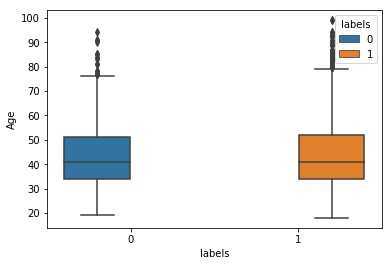

In [371]:
sns.boxplot(x= data['labels'], y = data['Age'],hue=data['labels'])

No such relation between the type of review and age of the customer.

**Positive Feedback Count vs labels**

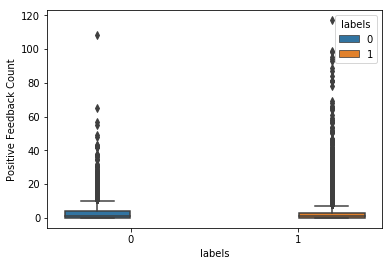

In [372]:
sns.boxplot(x= data['labels'], y = data['Positive Feedback Count'],hue=data['labels'])

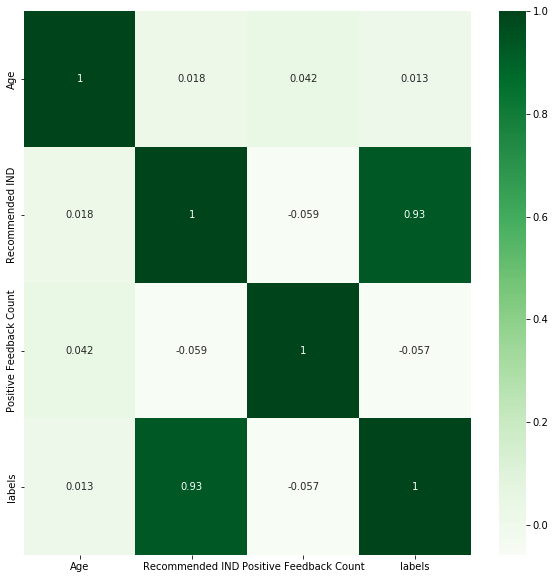

In [373]:
corr = round(data.corr(),3)
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap="Greens",annot=True)

**Inference:** labels are highly correlated with the recommended IND feature and positive feedback count has negative correlation value with the labels.

## Text Preprocessing

In [374]:
data.head()

,Age,Title,Review Text,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,labels
0,33,none,Absolutely wonderful - silky and sexy and comf...,1,0,Initmates,Intimate,Intimates,1
1,34,none,Love this dress! it's sooo pretty. i happene...,1,4,General,Dresses,Dresses,1
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,0,General Petite,Bottoms,Pants,1
4,47,Flattering shirt,This shirt is very flattering to all due to th...,1,6,General,Tops,Blouses,1
5,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",0,4,General,Dresses,Dresses,0


In [375]:
## Removing extraa symbols and converting each text to lowercase
def remove_special_char(s):
    import string
    for char in string.punctuation:
        s = s.replace(char, ' ')
    return s
    
    
data['Review Text'] = data['Review Text'].apply(lambda x:remove_special_char(x))
data['Title'] = data['Title'].apply(lambda x:remove_special_char(x))

In [376]:
## all special characters are removed lets convert each word to the lowercase;
def string_to_lowercase(st):
    st = st.lower()
    return st
data['Review Text'] = data['Review Text'].apply(lambda x:string_to_lowercase(x))
data['Title'] = data['Title'].apply(lambda x:string_to_lowercase(x))

In [377]:
data.head()

,Age,Title,Review Text,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,labels
0,33,none,absolutely wonderful silky and sexy and comf...,1,0,Initmates,Intimate,Intimates,1
1,34,none,love this dress it s sooo pretty i happene...,1,4,General,Dresses,Dresses,1
3,50,my favorite buy,i love love love this jumpsuit it s fun fl...,1,0,General Petite,Bottoms,Pants,1
4,47,flattering shirt,this shirt is very flattering to all due to th...,1,6,General,Tops,Blouses,1
5,49,not for the very petite,i love tracy reese dresses but this one is no...,0,4,General,Dresses,Dresses,0


**Stopwords removal**

In [378]:
stop = stopwords.words('english')
# In stopwords list not is also present but not can change the entire meaning of the sentence, so lets remove the entire stopwords except not
stop.remove("not")

In [379]:
data['Review Text'] = data['Review Text'].iloc[:].replace(stop,"")

## Data Preparation and feature engineering

In [380]:
data.columns

Index(['Age', 'Title', 'Review Text', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'labels'],
      dtype='object')

**Sentiment Analysis**

In [381]:
def sentiment_analaysis(corpus):
    import nltk
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    nltk.download('vader_lexicon')
    neg = []
    neu = []
    pos = []
    compound = []
    sid = SentimentIntensityAnalyzer()
    for sen in corpus:
        ss_1 = sid.polarity_scores(sen)
        neg.append(ss_1['neg'])
        neu.append(ss_1['neu'])
        pos.append(ss_1['pos'])
        compound.append(ss_1['compound'])
    return neg,neu,pos,compound
data['neg'], data['neu'], data['pos'], data['compound'] = sentiment_analaysis(data['Review Text'])

[nltk_data] Downloading package vader_lexicon to C:\Users\Adarsh
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [382]:
data.head()

,Age,Title,Review Text,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,labels,neg,neu,pos,compound
0,33,none,absolutely wonderful silky and sexy and comf...,1,0,Initmates,Intimate,Intimates,1,0.000,0.272,0.728,0.8932
1,34,none,love this dress it s sooo pretty i happene...,1,4,General,Dresses,Dresses,1,0.000,0.657,0.343,0.9719
3,50,my favorite buy,i love love love this jumpsuit it s fun fl...,1,0,General Petite,Bottoms,Pants,1,0.231,0.346,0.423,0.4805
4,47,flattering shirt,this shirt is very flattering to all due to th...,1,6,General,Tops,Blouses,1,0.000,0.713,0.287,0.9162
5,49,not for the very petite,i love tracy reese dresses but this one is no...,0,4,General,Dresses,Dresses,0,0.000,0.853,0.147,0.9419


In [383]:
# lets rremove target variable from the dataset
y = data['labels']
x = data.drop(['labels'],axis = 1)

In [384]:
x.columns

Index(['Age', 'Title', 'Review Text', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

**Train test split**

In [385]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, stratify = y, random_state = 42)
print("The shape of x_train and y_train is",x_train.shape,"and",y_train.shape)
print("The shape of x_test and y_test is",x_test.shape,"and",y_test.shape)

The shape of x_train and y_train is (14860, 12) and (14860,)
The shape of x_test and y_test is (4954, 12) and (4954,)


In [427]:
print(y_train.value_counts())
print("*"*50)
print(y_test.value_counts())

1    13083
0     1777
Name: labels, dtype: int64
**************************************************
1    4361
0     593
Name: labels, dtype: int64


**Tf-idf**

In [386]:
def tfidf_vectorizer(x_train,x_test,col):
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer()
    vectorizer.fit(x_train[col].values)
    x_train_tfidf = vectorizer.transform(x_train[col].values)
    x_test_tfidf = vectorizer.transform(x_test[col].values)
    return x_train_tfidf,x_test_tfidf

In [387]:
x_train_tfidf_review, x_test_tfidf_review = tfidf_vectorizer(x_train,x_test, "Review Text")
x_train_tfidf_title,x_test_tfidf_title = tfidf_vectorizer(x_train,x_test,"Title")

In [388]:
print("shape of x_train_tfidf_review and x_test_tfidf_review is",x_train_tfidf_review.shape,"and",x_test_tfidf_review.shape)
print("shape of x_train_tfidf_title and x_test_tfidf_title is",x_train_tfidf_title.shape,"and",x_test_tfidf_title.shape)

shape of x_train_tfidf_review and x_test_tfidf_review is (14860, 11885) and (4954, 11885)
shape of x_train_tfidf_title and x_test_tfidf_title is (14860, 2964) and (4954, 2964)


**Word2Vec**

In [389]:
def Average_w2v(data,col,vector_size:int):
    lst_of_sen = []
    for ele in data[col]:
        lst_of_sen.append(ele.split(' '))
    import gensim
    from gensim.models import Word2Vec
    model = Word2Vec(lst_of_sen, min_count = 1, vector_size = vector_size,window = 5, sg = 1)
    words = list(model.wv.key_to_index)
    sent_vector = []
    for lst in lst_of_sen:
        sen_vec = np.zeros(vector_size)
        count = 0
        for word in lst:
            if word in words:
                vec = model.wv[word]
                sen_vec += vec
                count += 1
        if count != 0:
            sen_vec /= count
        sent_vector.append(sen_vec)       
    return sent_vector

In [390]:
x_train_w2v_review = np.asarray(Average_w2v(x_train,"Review Text",200))
x_test_w2v_review = np.asarray(Average_w2v(x_test,"Review Text",200))

In [391]:
print("shape of x_train_w2v_review is", x_train_w2v_review.shape)
print("shape of x_test_w2v_review is", x_test_w2v_review.shape)

shape of x_train_w2v_review is (14860, 200)
shape of x_test_w2v_review is (4954, 200)


In [392]:
x_train_w2v_title = np.asarray(Average_w2v(x_train,"Title",50))
x_test_w2v_title = np.asarray(Average_w2v(x_test,"Title",50))
print("shape of x_train_w2v_title is", x_train_w2v_title.shape)
print("shape of x_test_w2v_title is", x_test_w2v_title.shape)

shape of x_train_w2v_title is (14860, 50)
shape of x_test_w2v_title is (4954, 50)


**one hot encoding**

In [393]:
def pandas_get_dummies(df,col):
    try:
        df1 = pd.get_dummies(df[col], drop_first = True)
        return np.asarray(df1)
    except Exception as e:
        return e

In [394]:
# Recommend IND
x_train_recomm = pandas_get_dummies(x_train,'Recommended IND')
x_test_recomm = pandas_get_dummies(x_test,'Recommended IND')
print("shape of x_train_recomm and x_test_recomm is", x_train_recomm.shape,"and",x_test_recomm.shape)
print("-"*50)

# Division Name
x_train_div = pandas_get_dummies(x_train,'Division Name')
x_test_div = pandas_get_dummies(x_test,'Division Name')
print("shape of x_train_div and x_test_div is", x_train_div.shape,"and",x_test_div.shape)
print("-"*50)

# Department Name
x_train_dep = pandas_get_dummies(x_train,'Department Name')
x_test_dep = pandas_get_dummies(x_test,'Department Name')
print("shape of x_train_dep and x_test_dep is", x_train_dep.shape,"and",x_test_dep.shape)
print("-"*50) 

# Class Name
x_train_class = pandas_get_dummies(x_train,'Class Name')
x_test_class = pandas_get_dummies(x_test,'Class Name')
print("shape of x_train_class and x_test_class is", x_train_class.shape,"and",x_test_class.shape)
print("-"*50)                                 

shape of x_train_recomm and x_test_recomm is (14860, 1) and (4954, 1)
--------------------------------------------------
shape of x_train_div and x_test_div is (14860, 2) and (4954, 2)
--------------------------------------------------
shape of x_train_dep and x_test_dep is (14860, 5) and (4954, 5)
--------------------------------------------------
shape of x_train_class and x_test_class is (14860, 17) and (4954, 17)
--------------------------------------------------


In [395]:
def normalization(X_train, X_test, col1):
    from sklearn.preprocessing import Normalizer
    normalizer = Normalizer()
    normalizer.fit(X_train[col1].values.reshape(-1,1))
    
    X_train_norm = normalizer.transform(X_train[col1].values.reshape(-1,1))
    X_test_norm= normalizer.transform(X_test[col1].values.reshape(-1,1))
    return X_train_norm, X_test_norm
    

In [396]:
# Age 
x_train_age,x_test_age = normalization(x_train, x_test, 'Age')
print("shape of x_train_age and x_test_age is", x_train_age.shape,"and",x_test_age.shape)
print("-"*50) 

# Positive Feedback Count
x_train_pos, x_test_pos = normalization(x_train, x_test, 'Positive Feedback Count')
print("shape of x_train_pos and x_test_pos is", x_train_pos.shape,"and",x_test_pos.shape)
print("-"*50) 

#sentiment analysis
x_train_neg = np.asarray(x_train['neg']).reshape(-1,1)
x_test_neg = np.asarray(x_test['neg']).reshape(-1,1)
print("shape of x_train_neg and x_test_neg is", x_train_neg.shape,"and",x_test_neg.shape)
print("-"*50) 

x_train_neu = np.asarray(x_train['neu']).reshape(-1,1)
x_test_neu = np.asarray(x_test['neu']).reshape(-1,1)
print("shape of x_train_neu and x_test_neu is", x_train_neu.shape,"and",x_test_neu.shape)
print("-"*50) 

x_train_pos = np.asarray(x_train['pos']).reshape(-1,1)
x_test_pos = np.asarray(x_test['pos']).reshape(-1,1)
print("shape of x_train_pos and x_test_pos is", x_train_pos.shape,"and",x_test_pos.shape)
print("-"*50)

x_train_com = np.asarray(x_train['compound']).reshape(-1,1)
x_test_com = np.asarray(x_test['compound']).reshape(-1,1)
print("shape of x_train_com and x_test_com is", x_train_com.shape,"and",x_test_com.shape)
print("-"*50) 

shape of x_train_age and x_test_age is (14860, 1) and (4954, 1)
--------------------------------------------------
shape of x_train_pos and x_test_pos is (14860, 1) and (4954, 1)
--------------------------------------------------
shape of x_train_neg and x_test_neg is (14860, 1) and (4954, 1)
--------------------------------------------------
shape of x_train_neu and x_test_neu is (14860, 1) and (4954, 1)
--------------------------------------------------
shape of x_train_pos and x_test_pos is (14860, 1) and (4954, 1)
--------------------------------------------------
shape of x_train_com and x_test_com is (14860, 1) and (4954, 1)
--------------------------------------------------


## Dataset set-1
<br> in this case,we will use the numerical feature + categorical feature + tfidf(Title) +tfidf(Review Text) +sentiment scores( Review text) as features to train and test model 

In [397]:
from scipy.sparse import hstack
x_train1 = hstack((x_train_age,x_train_pos,x_train_neg,x_train_neu,x_train_pos,x_train_com,x_train_recomm,x_train_div,x_train_dep,x_train_class,x_train_tfidf_review,x_train_tfidf_title)).tocsr()
x_test1 = hstack((x_test_age,x_test_pos,x_test_neg,x_test_neu,x_test_pos,x_test_com,x_test_recomm,x_test_div,x_test_dep,x_test_class,x_test_tfidf_review,x_test_tfidf_title)).tocsr()
print("shape of x_train1 and x_test1 is", x_train1.shape, "and",x_test1.shape)

shape of x_train1 and x_test1 is (14860, 14880) and (4954, 14880)


## Dataset set-2
<br> in this case,we will use the numerical feature + categorical feature + Average tfidf(Title) +Average tfidf(Review Text) +sentiment scores( Review text) as features to train and test model 

In [398]:
x_train2 = np.hstack((x_train_age,x_train_pos,x_train_neg,x_train_neu,x_train_pos,x_train_com,x_train_recomm,x_train_div,x_train_dep,x_train_class,x_train_w2v_review,x_train_w2v_title))
x_test2 = np.hstack((x_test_age,x_test_pos,x_test_neg,x_test_neu,x_test_pos,x_test_com,x_test_recomm,x_test_div,x_test_dep,x_test_class,x_test_w2v_review,x_test_w2v_title))
print("shape of x_train2 and x_test2 is", x_train2.shape, "and",x_test2.shape)

shape of x_train2 and x_test2 is (14860, 281) and (4954, 281)


## Model Training for dataset-1
<br> In this section we will train 5 models for each dataset
<br> (1) logistic regression
<br> (2) Decision Tree 
<br> (3) Random Forest 
<br> (4) Gradient Boosting using xgboost

In [96]:
# GridSearchCV for hyperparameter tuning
def GridSearchLR(estimator,parameter,x_train,y_train):
    try: 
        from sklearn.model_selection import GridSearchCV
        clf = GridSearchCV(estimator,param_grid=parameter,cv=3,scoring = 'roc_auc',return_train_score=True)
        clf.fit(x_train,y_train)
        result = pd.DataFrame(clf.cv_results_)
        #print(result)
        return result,clf.best_estimator_
    except Exception as e:
        return e
    
def plotting_train_test_score(result,param):
    try:
        C = result[param]
        train_score = result['mean_train_score']
        test_score = result['mean_test_score']
        plt.plot(C,train_score,'r',label = 'train_score')
        plt.plot(C,test_score,'y',label ='test_score')
        plt.xlabel('Hyperparameter')
        plt.ylabel('score')
        plt.legend()
        plt.show()
    except Exception as e:
        print(e)

In [199]:
def plot_roc_auc_plot(y_train,y_test,y_train_pred,y_test_pred):
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    train_AUC_bow = auc(train_fpr, train_tpr)
    test_AUC_bow = auc(test_fpr, test_tpr)

    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(train_AUC_bow))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(test_AUC_bow))
    plt.legend()
    plt.xlabel("False positive rate: FPR")
    plt.ylabel("True positive rate: FPR")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()


**1. Logistic Regression**
<br> It is a classification technique, which tries to fit a hyperplane to separate different classes. Mainly a binary classification problem.

In [195]:
parameter = {'C':[10**i for i in range(-3,1)]}
lr = LogisticRegression(random_state=42)
result,best_param = GridSearchLR(lr,parameter,x_train1,y_train)

In [196]:
print(best_param)

LogisticRegression(C=1, random_state=42)


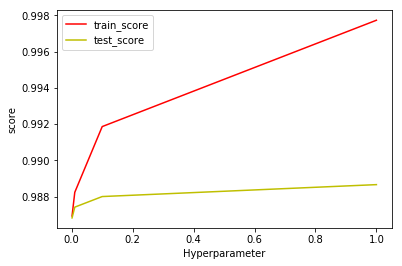

In [197]:
plotting_train_test_score(result,'param_C')

In [198]:
lr1 = LogisticRegression(C=1, random_state=42)
lr1.fit(x_train1,y_train)
y_train_pred_lr1 = lr1.predict(x_train1)
y_test_pred_lr1 = lr1.predict(x_test1)

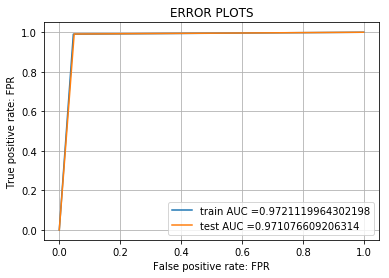

In [200]:
plot_roc_auc_plot(y_train,y_test,y_train_pred_lr1,y_test_pred_lr1)

In [201]:
# referances- https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
def heatmap_confusion_matrix(dataset):
    ax= plt.subplot();
    sns.heatmap(dataset, annot = True, fmt ='d', ax = ax)
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_ylim(2.0, 0)
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['0','1']); 
    ax.yaxis.set_ticklabels(['0','1']);

None


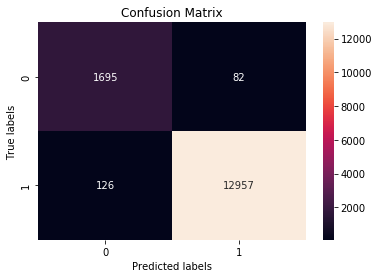

In [202]:
cm_train = confusion_matrix(y_train,y_train_pred_lr1 )
confusion_matrix_train = heatmap_confusion_matrix(cm_train)
print(confusion_matrix_train)

Test confusion matrix
None


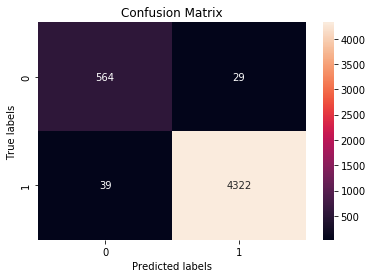

In [203]:
print("Test confusion matrix")
cm_test = confusion_matrix(y_test, y_test_pred_lr1)
confusion_matrix_test = heatmap_confusion_matrix(cm_test)
print(confusion_matrix_test)

**observations:**
<br> (1) Best value of C obtained from hyperparameter tuning is 1.
<br> (2) At C = 1, the train_auc and test_value is 0.972112 and 0.971076
<br> (3) for training set, From confusion matrix it can be seen that out of 1777 negative value total 1695 were predicted correctly and out of 13083 positive label 12957 were predicted correctly.
<br> (4) for test set, From confusion matrix it can be seen that out of 593 negative value total 564 were predicted correctly and out of 4361 positive label 4322 were predicted correctly.

**2. Decision Trees**:
<br> A decision Tree is drawn upside down from root at its top and leaf nodes are at bottom which actually represent the final label of the dataset.  In decision tree, at each node there is a decision made and based on that there is split of data. Can be used for both classification and regression.

In [204]:
parameter = {'max_depth' : [1,2,3,4,5], 'min_samples_split' : [50,100,200,300]}

DTC1 = DecisionTreeClassifier(random_state = 42)
result_dt,best_param_dt = GridSearchLR(DTC1,parameter,x_train1,y_train)
#print(result_dt)
print(best_param_dt)

DecisionTreeClassifier(max_depth=3, min_samples_split=50, random_state=42)


In [205]:
train_auc= result_dt['mean_train_score']
cv_auc = result_dt['mean_test_score'] 
best_max_depth = result_dt['param_max_depth']
best_min_samples_split = result_dt['param_min_samples_split']

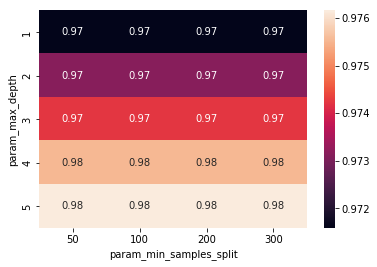

In [206]:
dataset_train = result_dt.pivot('param_max_depth', 'param_min_samples_split', 'mean_train_score')
ax = sns.heatmap(dataset_train, annot=True)

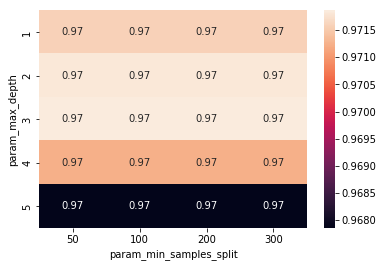

In [207]:
dataset_train = result_dt.pivot('param_max_depth', 'param_min_samples_split', 'mean_test_score')
ax = sns.heatmap(dataset_train, annot=True)

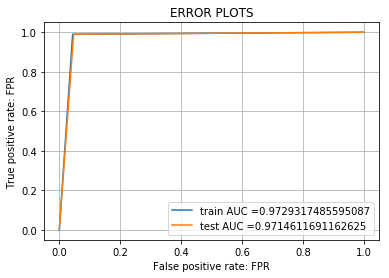

In [208]:
DTC = DecisionTreeClassifier(max_depth= 3, min_samples_split= 50,random_state = 42)
DTC.fit(x_train1,y_train)
y_train_pred_dt1 = DTC.predict(x_train1)
y_test_pred_dt1 = DTC.predict(x_test1)
plot_roc_auc_plot(y_train,y_test,y_train_pred_dt1,y_test_pred_dt1)

None


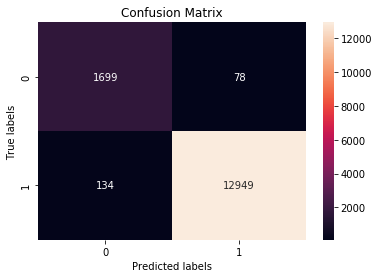

In [209]:
cm_train = confusion_matrix(y_train,y_train_pred_dt1 )
confusion_matrix_train = heatmap_confusion_matrix(cm_train)
print(confusion_matrix_train)

Test confusion matrix
None


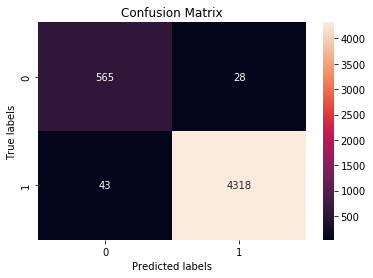

In [210]:
print("Test confusion matrix")
cm_test = confusion_matrix(y_test, y_test_pred_dt1)
confusion_matrix_test = heatmap_confusion_matrix(cm_test)
print(confusion_matrix_test)

**Observation**
<br> (1) From GridSearchCV, best hyperparameter obtained is max_depth = 3, min_sample_split = 50. At this hyperparameter, the train_auc and test_auc values are 0.972932 and 0.971461.
<br> (2) for training set, From confusion matrix it can be seen that out of 1777 negative value total 1699 were predicted correctly and out of 13083 positive label 12949 were predicted correctly.
<br> (3) for test set, From confusion matrix it can be seen that out of 593 negative value total 565 were predicted correctly and out of 4361 positive label 4318 were predicted correctly.
<br> (4) we can observe that both the model are perform very similar.

**3. Random Forest**
<br> Random Forest is based on the bagging technique where base models are decision trees.
Bagging stands for Bootstrap Aggregation. In this technique, we make multiple sample using column and row randomization with replacement and train decision trees on each samples. And based on the decision made by each tree we decide the final outcome.
Generally, In bagging our each base model should be of high variance and less variance so we train decision with high depth in case of random forest.

In [428]:
# since max_depth in case of decision tree is 3 and in random forest generally we train deep tree so keeping max_depth >=3.
parameter = {'n_estimators':[50,100,200,300], 'max_depth':[3,4,5,6]} 
rf = RandomForestClassifier(random_state=42)
GS3 = GridSearchCV(rf, param_grid = parameter, cv =3, scoring ='roc_auc', n_jobs = -1, return_train_score=True)
GS3.fit(x_train1,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [50, 100, 200, 300]},
             return_train_score=True, scoring='roc_auc')

In [429]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [430]:
results_rf = pd.DataFrame.from_dict(GS1.cv_results_)
results_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.464937,0.078361,0.022385,0.000917,0.07,1,100,"{'learning_rate': 0.07, 'max_depth': 1, 'n_est...",0.981214,0.986364,0.990158,0.985912,0.003666,16,0.989969,0.989616,0.986660,0.988748,0.001484
1,8.568810,0.062529,0.027544,0.003888,0.07,1,200,"{'learning_rate': 0.07, 'max_depth': 1, 'n_est...",0.985215,0.987544,0.990754,0.987837,0.002271,15,0.993439,0.993986,0.991076,0.992834,0.001263
2,12.811542,0.037471,0.023943,0.005360,0.07,1,300,"{'learning_rate': 0.07, 'max_depth': 1, 'n_est...",0.986677,0.988032,0.990879,0.988529,0.001751,11,0.995211,0.995760,0.993352,0.994774,0.001031
3,17.419351,0.178199,0.025489,0.003334,0.07,1,400,"{'learning_rate': 0.07, 'max_depth': 1, 'n_est...",0.986584,0.988021,0.991299,0.988635,0.001973,9,0.996093,0.996734,0.994685,0.995837,0.000856
4,7.179209,0.069373,0.020334,0.002488,0.07,2,100,"{'learning_rate': 0.07, 'max_depth': 2, 'n_est...",0.984339,0.987763,0.992306,0.988136,0.003263,14,0.995214,0.995054,0.993157,0.994475,0.000934


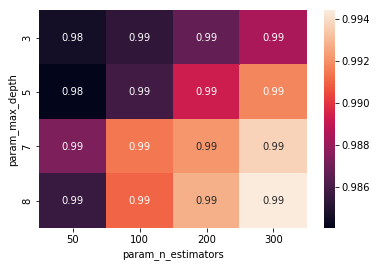

In [431]:
dataset_train = result_rf.pivot('param_max_depth', 'param_n_estimators', 'mean_train_score')
ax = sns.heatmap(dataset_train, annot=True)

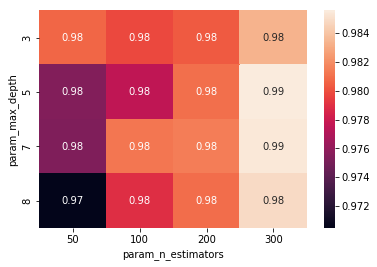

In [432]:
dataset_test = result_rf.pivot('param_max_depth', 'param_n_estimators', 'mean_test_score')
ax = sns.heatmap(dataset_test, annot=True)

In [433]:
GS3.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=300, random_state=42)

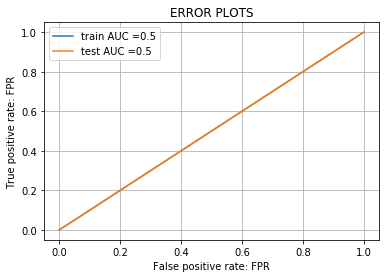

In [434]:
rf1 = RandomForestClassifier(max_depth=6,  n_estimators=300,
                       random_state=42)
rf1.fit(x_train1,y_train)
y_train_pred_rf1 = rf1.predict(x_train1)
y_test_pred_rf1 = rf1.predict(x_test1)
plot_roc_auc_plot(y_train,y_test,y_train_pred_rf1,y_test_pred_rf1)

None


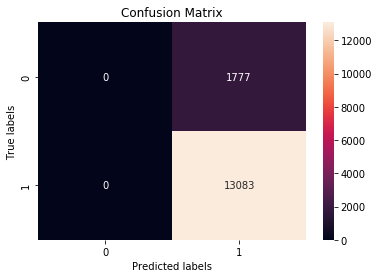

In [435]:
cm_train = confusion_matrix(y_train,y_train_pred_rf1 )
confusion_matrix_train = heatmap_confusion_matrix(cm_train)
print(confusion_matrix_train)

Test confusion matrix
None


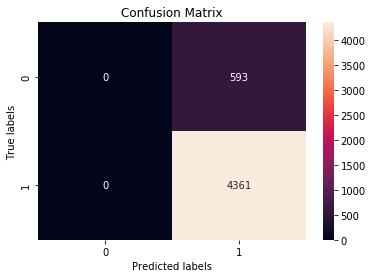

In [436]:
print("Test confusion matrix")
cm_test = confusion_matrix(y_test, y_test_pred_rf1)
confusion_matrix_test = heatmap_confusion_matrix(cm_test)
print(confusion_matrix_test)

**Observation**
<br> (1) From GridSearchCV, best hyperparameter obtained is max_depth = 5, min_sample_split = 150, n_estimators = 300. At this hyperparameter, the train_auc and test_auc values are 0.5 and 0.5.
<br> (2) for both training and test data, it is simply predicting all values as 1 which is highly biased. 
<br> (3) Random Forest is performing as good as the random model and way worse than logistic regression and Decision trees.

**4. Gradient Boosting**
<br>  Xgboost is an implementation of Gradient Boosting Decision Trees which based on the concept of boosting. In Boosting, there is sequential arrangement of model in which each model train on the output obtained from the previous model. 
In Boosting we generally train high bias and low variance model and with each estimator we try to reduce the bias of the model. In Gradient Boosting Decision Trees, the base models are the decision tree of very low depth. 

In [79]:
## hyperparameter tuning 
# generally learning_rate should be less than 0.07 to avoid overfitting.
parameter = {'max_depth' : [1,2, 3, 4], 'n_estimators' : [100, 200,300, 400],'learning_rate': [0.07]}
xgbc1 = XGBClassifier()
print(xgbc1.get_params().keys())
GS1 = GridSearchCV(xgbc1, param_grid = parameter, cv =3, scoring ='roc_auc', n_jobs = -1, return_train_score=True)
GS1.fit(x_train1, y_train)

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'enable_categorical', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])
[09:36:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [80]:
results_gbdt = pd.DataFrame.from_dict(GS1.cv_results_)
results_gbdt.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.464937,0.078361,0.022385,0.000917,0.07,1,100,"{'learning_rate': 0.07, 'max_depth': 1, 'n_est...",0.981214,0.986364,0.990158,0.985912,0.003666,16,0.989969,0.989616,0.986660,0.988748,0.001484
1,8.568810,0.062529,0.027544,0.003888,0.07,1,200,"{'learning_rate': 0.07, 'max_depth': 1, 'n_est...",0.985215,0.987544,0.990754,0.987837,0.002271,15,0.993439,0.993986,0.991076,0.992834,0.001263
2,12.811542,0.037471,0.023943,0.005360,0.07,1,300,"{'learning_rate': 0.07, 'max_depth': 1, 'n_est...",0.986677,0.988032,0.990879,0.988529,0.001751,11,0.995211,0.995760,0.993352,0.994774,0.001031
3,17.419351,0.178199,0.025489,0.003334,0.07,1,400,"{'learning_rate': 0.07, 'max_depth': 1, 'n_est...",0.986584,0.988021,0.991299,0.988635,0.001973,9,0.996093,0.996734,0.994685,0.995837,0.000856
4,7.179209,0.069373,0.020334,0.002488,0.07,2,100,"{'learning_rate': 0.07, 'max_depth': 2, 'n_est...",0.984339,0.987763,0.992306,0.988136,0.003263,14,0.995214,0.995054,0.993157,0.994475,0.000934


Text(0.5,1,'train')

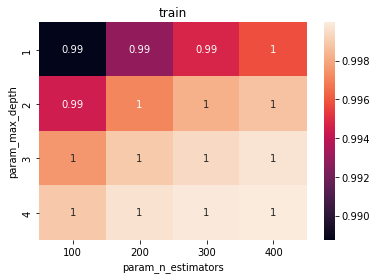

In [81]:
dataset_train1 = results_gbdt.pivot('param_max_depth', 'param_n_estimators', 'mean_train_score')
ax = sns.heatmap(dataset_train1, annot=True)
ax.set_title('train')

Text(0.5,1,'cv')

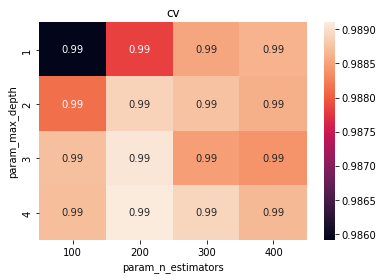

In [82]:
dataset_test1 = results_gbdt.pivot('param_max_depth', 'param_n_estimators', 'mean_test_score')
ax = sns.heatmap(dataset_test1, annot=True)
ax.set_title("cv")

In [83]:
GS1.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.07, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
clf1 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.07, max_delta_step=0,
              max_depth=4, min_child_weight=1, 
              monotone_constraints='()', n_estimators=200, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
clf1.fit(x_train1,y_train)

[10:29:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.07, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

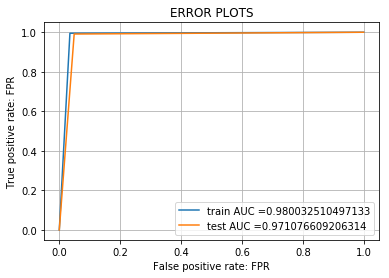

In [87]:
y_train_pred_gd1 = clf1.predict(x_train1)
y_test_pred_gd1 =clf1.predict(x_test1)
plot_roc_auc_plot(y_train,y_test,y_train_pred_gd1,y_test_pred_gd1)

None


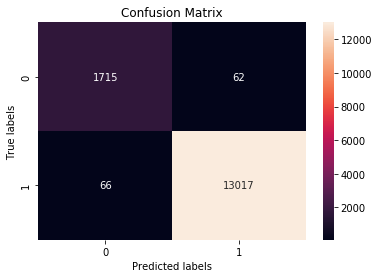

In [90]:
cm_train = confusion_matrix(y_train,y_train_pred_gd1 )
confusion_matrix_train = heatmap_confusion_matrix(cm_train)
print(confusion_matrix_train)

Test confusion matrix
None


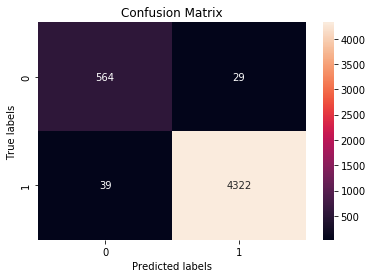

In [91]:
print("Test confusion matrix")
cm_test = confusion_matrix(y_test, y_test_pred_gd1)
confusion_matrix_test = heatmap_confusion_matrix(cm_test)
print(confusion_matrix_test)

**observation**
<br> (1) From GridSearchCV, best hyperparameter obtained is max_depth = 4, n_estimators = 200. At this hyperparameter, the train_auc and test_auc values are 0.980033 and 0.971077.
<br> (2) for training set, From confusion matrix it can be seen that out of 1777 negative value total 1715 were predicted correctly and out of 13083 positive label 13017 were predicted correctly.
<br> (3) for test set, From confusion matrix it can be seen that out of 593 negative value total 564 were predicted correctly and out of 4361 positive label 4322 were predicted correctly.
<br> (4) logistic regression, decision trees and xgboost are performing very similar.

# Model training on dataset 2:

**1. Logistic Regression**

In [399]:
parameter = {'C':[10**i for i in range(-3,1)]}
lr = LogisticRegression(random_state=42)
result2,best_param2 = GridSearchLR(lr,parameter,x_train2,y_train)
print(best_param)

LogisticRegression(C=1, random_state=42)


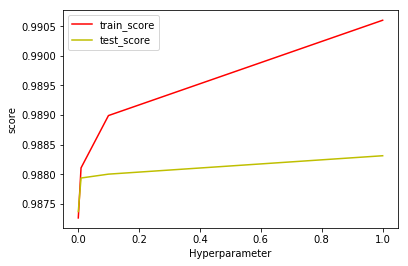

In [400]:
plotting_train_test_score(result2,'param_C')

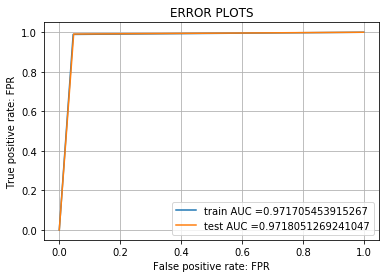

In [401]:
lr2 = LogisticRegression(C=1, random_state=42)
lr2.fit(x_train2,y_train)
y_train_pred_lr2 = lr2.predict(x_train2)
y_test_pred_lr2 = lr2.predict(x_test2)
plot_roc_auc_plot(y_train,y_test,y_train_pred_lr2,y_test_pred_lr2)

None


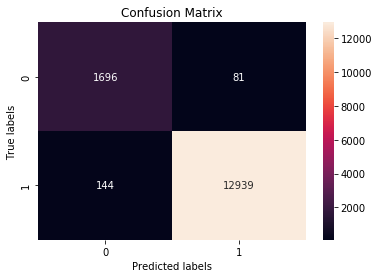

In [402]:
cm_train = confusion_matrix(y_train,y_train_pred_lr2 )
confusion_matrix_train = heatmap_confusion_matrix(cm_train)
print(confusion_matrix_train)

Test confusion matrix
None


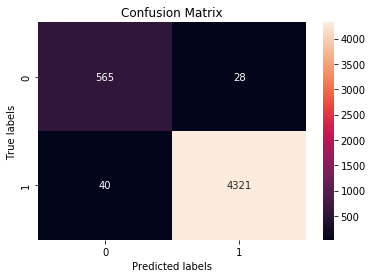

In [403]:
print("Test confusion matrix")
cm_test = confusion_matrix(y_test, y_test_pred_lr2)
confusion_matrix_test = heatmap_confusion_matrix(cm_test)
print(confusion_matrix_test)

**observations:**
<br> (1) Best value of C obtained from hyperparameter tuning is 1.
<br> (2) At C = 1, the train_auc and test_value is 0.971705 and 0.971805.
<br> (3) for training set, From confusion matrix it can be seen that out of 1777 negative value total 1696 were predicted correctly and out of 13083 positive label 12939 were predicted correctly.
<br> (4) for test set, From confusion matrix it can be seen that out of 593 negative value total 565 were predicted correctly and out of 4361 positive label 4321 were predicted correctly.
<br> (5) performing very similar as in case of dataset I.

**2.Decision Trees**

In [404]:
parameter = {'max_depth' : [1,2,3,4,5], 'min_samples_split' : [50,100,150,200]}

DTC2 = DecisionTreeClassifier(random_state = 42)
result_dt2,best_param_dt2 = GridSearchLR(DTC2,parameter,x_train2,y_train)
#print(result_dt)
print(best_param_dt)

DecisionTreeClassifier(max_depth=3, min_samples_split=50, random_state=42)


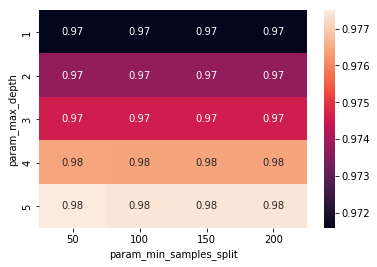

In [405]:
dataset_train = result_dt2.pivot('param_max_depth', 'param_min_samples_split', 'mean_train_score')
ax = sns.heatmap(dataset_train, annot=True)

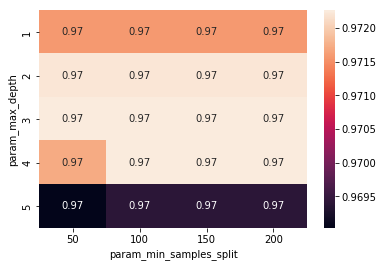

In [406]:
dataset_train = result_dt2.pivot('param_max_depth', 'param_min_samples_split', 'mean_test_score')
ax = sns.heatmap(dataset_train, annot=True)

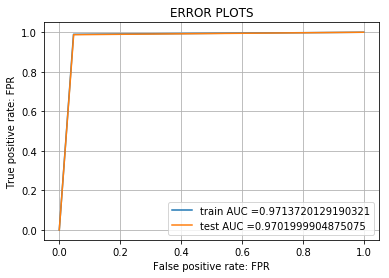

In [407]:
DTC3 = DecisionTreeClassifier(max_depth= 3, min_samples_split= 50,random_state = 42)
DTC3.fit(x_train2,y_train)
y_train_pred_dt2 = DTC3.predict(x_train2)
y_test_pred_dt2 = DTC3.predict(x_test2)
plot_roc_auc_plot(y_train,y_test,y_train_pred_dt2,y_test_pred_dt2)

None


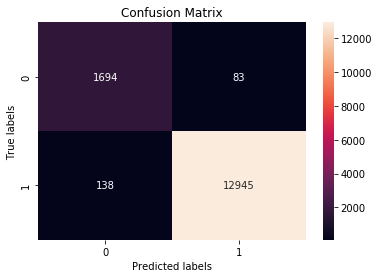

In [409]:
cm_train = confusion_matrix(y_train,y_train_pred_dt2 )
confusion_matrix_train = heatmap_confusion_matrix(cm_train)
print(confusion_matrix_train)

Test confusion matrix
None


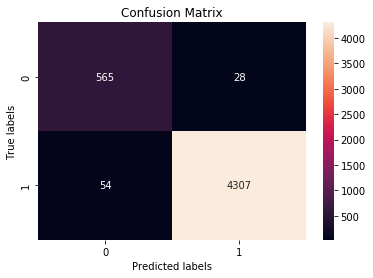

In [410]:
print("Test confusion matrix")
cm_test = confusion_matrix(y_test, y_test_pred_dt2)
confusion_matrix_test = heatmap_confusion_matrix(cm_test)
print(confusion_matrix_test)

**Observation**
<br> (1) From GridSearchCV, best hyperparameter obtained is max_depth = 3, min_sample_split = 50. At this hyperparameter, the train_auc and test_auc values are 0.971372 and 0.970199.
<br> (2) for training set, From confusion matrix it can be seen that out of 1777 negative value total 1694 were predicted correctly and out of 13083 positive label 12945 were predicted correctly.
<br> (3) for test set, From confusion matrix it can be seen that out of 593 negative value total 565 were predicted correctly and out of 4361 positive label 4307 were predicted correctly.
<br> (4) Both the decision trees model perform very similar but model on 1st dataset perform slightly better.

**3.Random Forest**

In [411]:
parameter = {'n_estimators':[50,100,200,300], 'max_depth':[2,3,4,5,6]} 
rf2 = RandomForestClassifier(random_state=42)
result_rf2,best_param_rf2 = GridSearchLR(rf,parameter,x_train2,y_train)
print(best_param_rf)

RandomForestClassifier(max_depth=5, n_estimators=300, random_state=42)


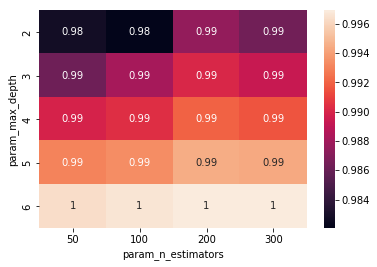

In [412]:
dataset_train = result_rf2.pivot('param_max_depth', 'param_n_estimators', 'mean_train_score')
ax = sns.heatmap(dataset_train, annot=True)

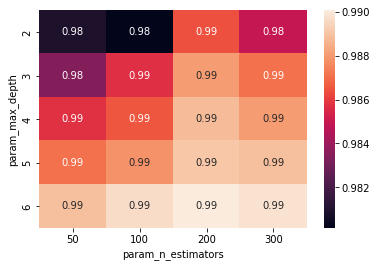

In [413]:
dataset_test = result_rf2.pivot('param_max_depth', 'param_n_estimators', 'mean_test_score')
ax = sns.heatmap(dataset_test, annot=True)

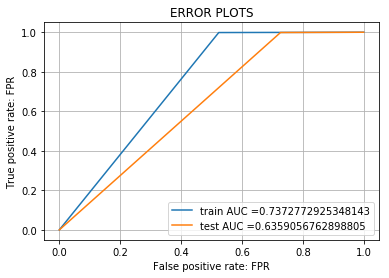

In [414]:
rf1 = RandomForestClassifier(max_depth=5, n_estimators=300, random_state=42)
rf1.fit(x_train2,y_train)
y_train_pred_rf2 = rf1.predict(x_train2)
y_test_pred_rf2 = rf1.predict(x_test2)
plot_roc_auc_plot(y_train,y_test,y_train_pred_rf2,y_test_pred_rf2)

None


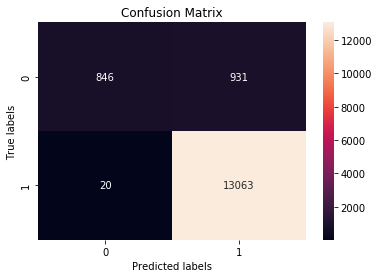

In [415]:
cm_train = confusion_matrix(y_train,y_train_pred_rf2 )
confusion_matrix_train = heatmap_confusion_matrix(cm_train)
print(confusion_matrix_train)

Test confusion matrix
None


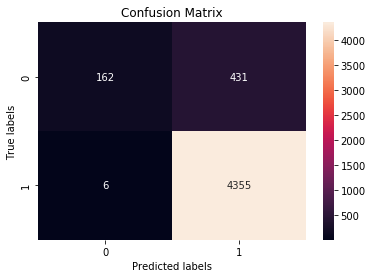

In [416]:
print("Test confusion matrix")
cm_test = confusion_matrix(y_test, y_test_pred_rf2)
confusion_matrix_test = heatmap_confusion_matrix(cm_test)
print(confusion_matrix_test)

**Observation**
<br> (1) From GridSearchCV, best hyperparameter obtained is max_depth = 5, n_estimators = 300. At this hyperparameter, the train_auc and test_auc values are 0.737277 and 0.635906. The difference between train and test score is high so clearly this model is overfitting.
<br> (2) for training set, From confusion matrix it can be seen that out of 1777 negative value total 846 were predicted correctly and out of 13083 positive label 13063 were predicted correctly.
<br> (3) for test set, From confusion matrix it can be seen that out of 593 negative value total 162 were predicted correctly and out of 4361 positive label 4355 were predicted correctly.. 
<br> (5) It is performing better than the random forest for dataset I. for predicting positive value it is performing better than all the trained model but for predicting negative lebel it is worst model.

**4.Gradient boosting**

In [417]:
## hyperparameter tuning 
parameter = {'max_depth' : [1,2, 3, 4], 'n_estimators' : [100, 200,300, 400],'learning_rate': [0.07]}
xgbc2 = XGBClassifier()
print(xgbc2.get_params().keys())
GS2 = GridSearchCV(xgbc2, param_grid = parameter, cv =3, scoring ='roc_auc', n_jobs = -1, return_train_score=True)
GS2.fit(x_train2, y_train)

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'enable_categorical', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])
[11:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [418]:
results_gbdt2 = pd.DataFrame.from_dict(GS2.cv_results_)
results_gbdt2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,12.838484,0.090056,0.068129,0.023845,0.07,1,100,"{'learning_rate': 0.07, 'max_depth': 1, 'n_est...",0.986133,0.984830,0.991199,0.987387,0.002747,16,0.992017,0.992321,0.989969,0.991436,0.001044
1,25.065590,0.078869,0.054376,0.012360,0.07,1,200,"{'learning_rate': 0.07, 'max_depth': 1, 'n_est...",0.986439,0.985805,0.991854,0.988033,0.002714,13,0.994850,0.994439,0.992489,0.993926,0.001030
2,38.494812,0.298482,0.051513,0.007698,0.07,1,300,"{'learning_rate': 0.07, 'max_depth': 1, 'n_est...",0.985792,0.986140,0.992041,0.987991,0.002867,14,0.996060,0.995638,0.993876,0.995191,0.000946
3,52.027150,0.405783,0.051332,0.009526,0.07,1,400,"{'learning_rate': 0.07, 'max_depth': 1, 'n_est...",0.985209,0.986249,0.992116,0.987858,0.003041,15,0.996924,0.996501,0.995024,0.996150,0.000815
4,21.425767,0.125343,0.039280,0.015532,0.07,2,100,"{'learning_rate': 0.07, 'max_depth': 2, 'n_est...",0.986418,0.987914,0.993141,0.989158,0.002882,4,0.996582,0.996305,0.994964,0.995951,0.000707


Text(0.5,1,'train')

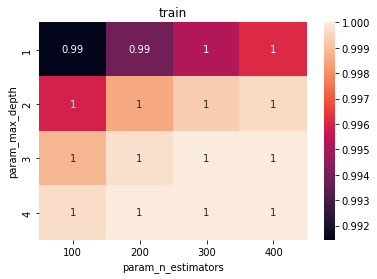

In [419]:
dataset_train1 = results_gbdt2.pivot('param_max_depth', 'param_n_estimators', 'mean_train_score')
ax = sns.heatmap(dataset_train1, annot=True)
ax.set_title('train')

Text(0.5,1,'cv')

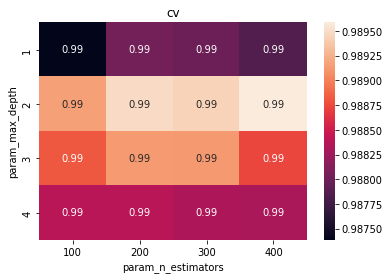

In [420]:
dataset_test1 = results_gbdt2.pivot('param_max_depth', 'param_n_estimators', 'mean_test_score')
ax = sns.heatmap(dataset_test1, annot=True)
ax.set_title("cv")

In [421]:
GS2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.07, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [422]:
clf2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.07, max_delta_step=0,
              max_depth=2, min_child_weight=1, 
              monotone_constraints='()', n_estimators=400, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
clf2.fit(x_train2,y_train)

[11:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.07, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

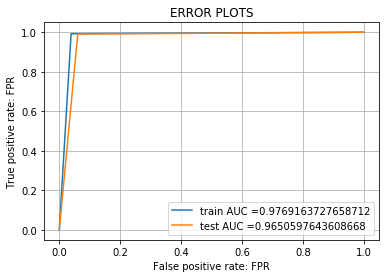

In [423]:
y_train_pred_gd2 = clf2.predict(x_train2)
y_test_pred_gd2 =clf2.predict(x_test2)
plot_roc_auc_plot(y_train,y_test,y_train_pred_gd2,y_test_pred_gd2)

None


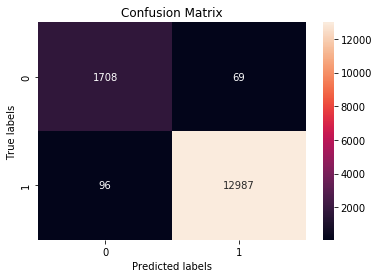

In [424]:
cm_train = confusion_matrix(y_train,y_train_pred_gd2 )
confusion_matrix_train = heatmap_confusion_matrix(cm_train)
print(confusion_matrix_train)

Test confusion matrix
None


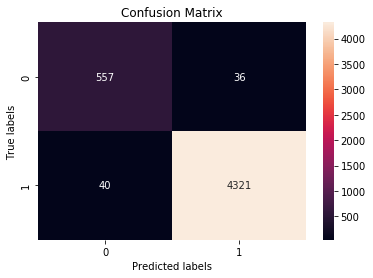

In [425]:
print("Test confusion matrix")
cm_test = confusion_matrix(y_test, y_test_pred_gd2)
confusion_matrix_test = heatmap_confusion_matrix(cm_test)
print(confusion_matrix_test)

**observation**
<br> (1) From GridSearchCV, best hyperparameter obtained is max_depth = 2, n_estimators = 400. At this hyperparameter, the train_auc and test_auc values are 0.976916 and 0.965059.
<br> (2) for training set, From confusion matrix it can be seen that out of 1777 negative value total 1708 were predicted correctly and out of 13083 positive label 12987 were predicted correctly.
<br> (3) for test set, From confusion matrix it can be seen that out of 593 negative value total 557 were predicted correctly and out of 4361 positive label 4321 were predicted correctly.
<br> (4) xgboost for dataset I perform slightly better than this model.

**Final Summary**

In [426]:
from prettytable import PrettyTable

Table = PrettyTable()

Table.field_names = ["vectorizer", "Model","Train AUC", "Test AUC"]
Table.add_row(["TF-IDF", "logistic regression", "0.972112","0.971077"])
Table.add_row(["TF-IDF","Decision Trees", "0.972931","0.971466"])             
Table.add_row(["TF-IDF", "Random Forest","0.5", "0.5"])
Table.add_row(["TF-IDF", "xgboost", "0.980033","0.971077"])
Table.add_row(["Average W2V","logistic regression", "0.971705","0.971805"])
Table.add_row(["Average W2V","Decision Trees", "0.971372","0.970199"])             
Table.add_row(["Average W2V", "Random Forest","0.737277", "0.635906"])
Table.add_row(["Average W2V", "xgboost","0.976916", "0.965059"])


print(Table)

+-------------+---------------------+-----------+----------+
|  vectorizer |        Model        | Train AUC | Test AUC |
+-------------+---------------------+-----------+----------+
|    TF-IDF   | logistic regression |  0.972112 | 0.971077 |
|    TF-IDF   |    Decision Trees   |  0.972931 | 0.971466 |
|    TF-IDF   |    Random Forest    |    0.5    |   0.5    |
|    TF-IDF   |       xgboost       |  0.980033 | 0.971077 |
| Average W2V | logistic regression |  0.971705 | 0.971805 |
| Average W2V |    Decision Trees   |  0.971372 | 0.970199 |
| Average W2V |    Random Forest    |  0.737277 | 0.635906 |
| Average W2V |       xgboost       |  0.976916 | 0.965059 |
+-------------+---------------------+-----------+----------+


**Conclusion:**
<br>Apart from the Random Forest, all model perform very good and score approximately similar.
So, Rather than going for complex model like xgboost, we can simply use logistic regression or Decision tree for any dataset.
